In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
# Lee el archivo CSV y crea un DataFrame
df = pd.read_csv('temps.csv')

# Imprime el DataFrame
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
df.shape

(348, 12)

In [6]:
# 1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de 
# otro modo, realice un análisis descriptivo de sus datos, comente.

df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


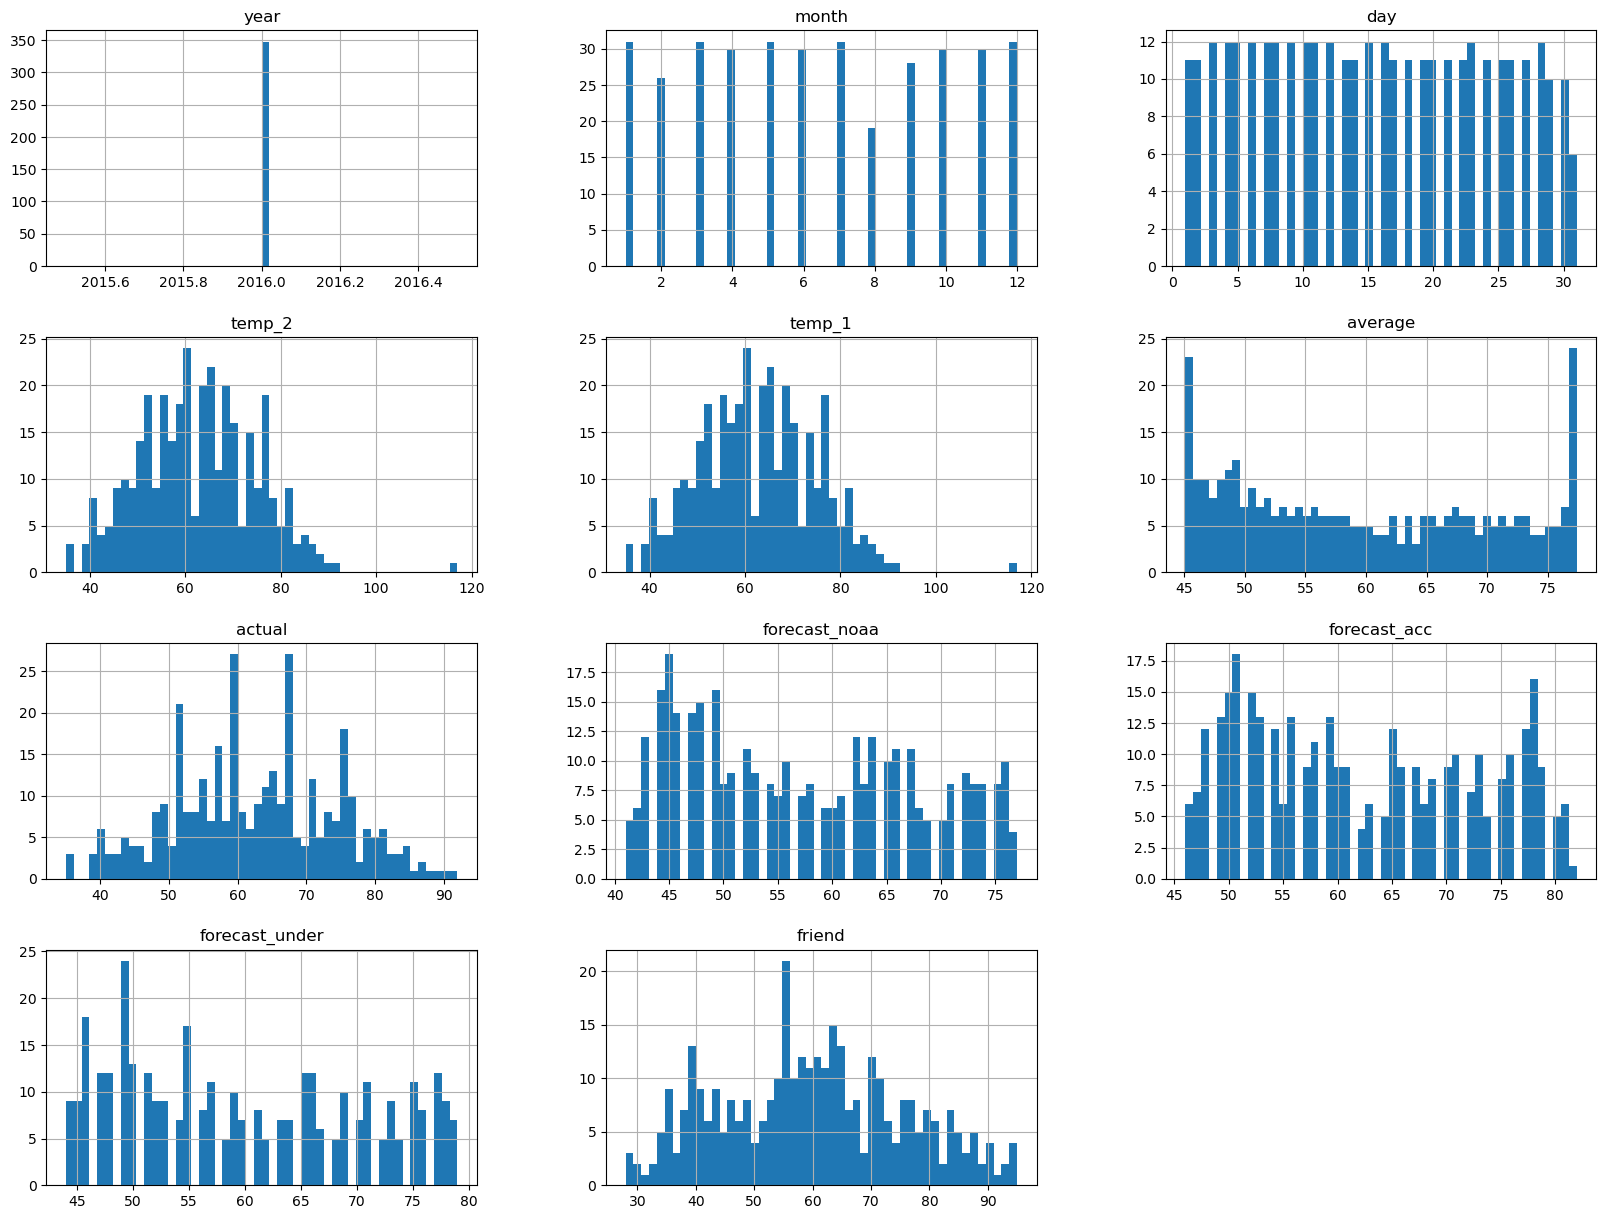

In [7]:
# graficos histogramas de las variables
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

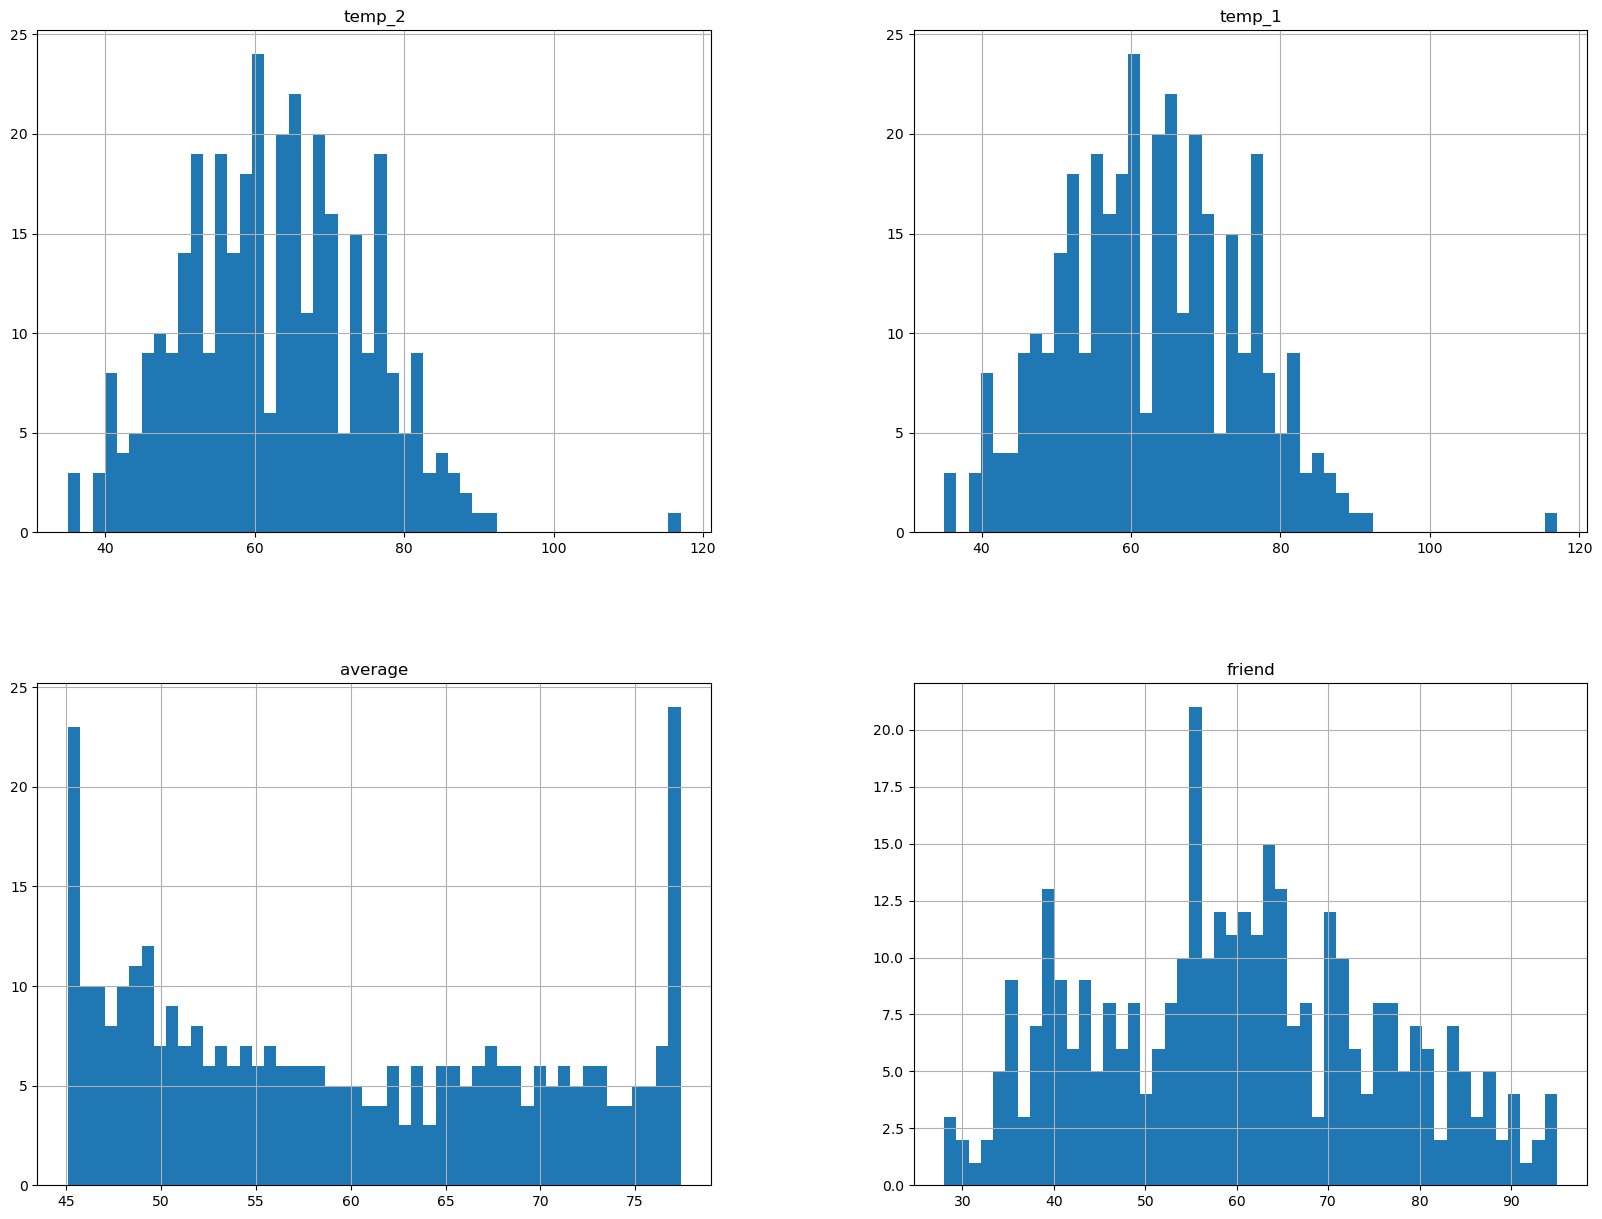

In [11]:
# 2. Realice un análisis gráfico de las temperaturas máximas históricas, las 
# temperaturas de los dos días anteriores y la estimación del amigo, con 
# respecto a la fecha. Comente si hay anomalías.

df.hist(column= ['temp_2', 'temp_1', 'average', 'friend'], bins=50, figsize=(20,15))
plt.show()

In [12]:
# 3. Recodifique los días de la semana, creando siete variables 1-0 asociados 
# a los días de la semana. Le puede facilitar el proceso usando 
# get_dummies de la librería Pandas.

df2 = df.drop(columns=['forecast_noaa', 'forecast_acc', 'forecast_under'])
df2.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [13]:
df3 = pd.get_dummies(df2, columns=['week'])
df3.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [14]:
# 4. Ahora, separe los datos en predictores y variable respuesta. Su variable 
# Y es la temperatura máxima real y los predictores son todas las 
# columnas que usa el modelo para hacer una predicción. Asegúrese de 
# transformar en una matriz Numpy porque esa es la forma en que 
# funciona el algoritmo.

X = df3.drop('actual', axis=1)
y = df3['actual']

X = np.array(X)
y = np.array(y)

In [16]:
# 5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla 
# (random_state = 42) para obtener los mismos valores

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# 6. Cree una línea de base, es decir, el error que obtendremos si 
# simplemente predijéramos la temperatura máxima promedio para 
# todos los días.

baseline_prediction = np.full_like(y_test, np.mean(y_train))
baseline_mae = np.mean(np.abs(baseline_prediction - y_test))
print("Error promedio absoluto (MAE) de la línea de base:", baseline_mae)

Error promedio absoluto (MAE) de la línea de base: 9.586206896551724


In [18]:
# 7. Ajuste un modelo de regresión de bosque aleatorio con los datos de 
# entrenamiento. Implemente 1000 árboles y use la misma semilla 
# declarada en el punto 5.

# Crear el modelo de Bosque Aleatorio
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [35]:
# 8. Obtenga la predicción. Coméntalo.

# Obtener las predicciones del modelo para los datos de prueba
predicciones = random_forest.predict(X_test)


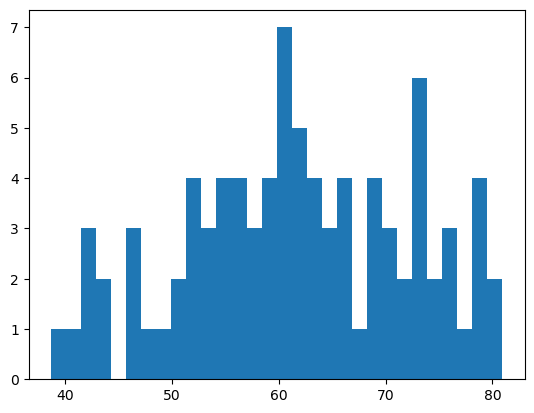

In [34]:
# graficar histograma de las predicciones
plt.hist(predicciones, bins=30)
plt.show()

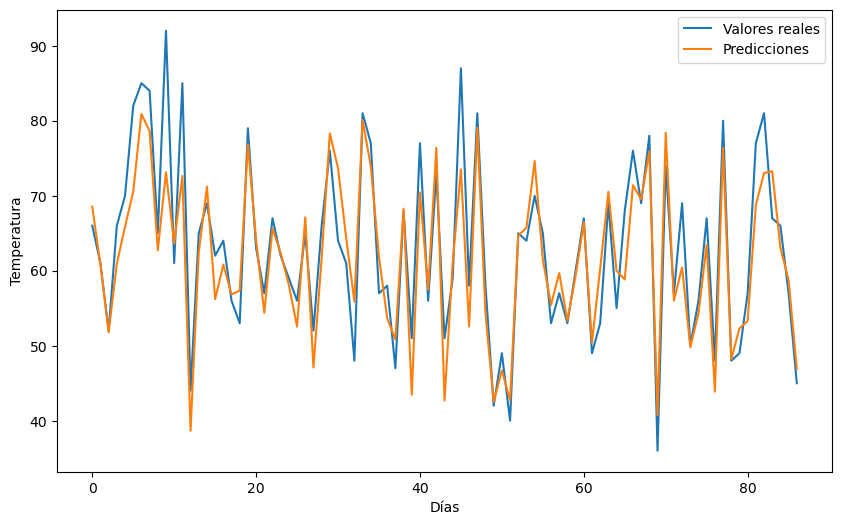

In [32]:
# graficar las predicciones vs los valores reales

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Valores reales')
plt.plot(predicciones, label='Predicciones')
plt.legend()
plt.xlabel('Días')
plt.ylabel('Temperatura')
plt.show()


In [ ]:
# interprear resultados del punto 8
# Se observa que las predicciones se ajustan bastante bien a los valores reales, 
# lo que indica que el modelo es bueno.

In [36]:
# Comparar las predicciones con los valores reales
# for i in range(len(predicciones)):
#     print("Predicción:", predicciones[i], " - Valor real:", y_test[i])

In [21]:
# 9. Obtenga las métricas de precisión.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular el MAE
mae = mean_absolute_error(y_test, predicciones)

# Calcular el MSE
mse = mean_squared_error(y_test, predicciones)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Mostrar las métricas de precisión
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.834172413793103
MSE: 25.399714471264364
RMSE: 5.039812940106445


In [ ]:
# 10. ¿Considera que el modelo es adecuado?

# el modelo es adecuado, ya que el error es bajo comparado con el error calculado en el punto 6
# además, se observa que las predicciones se ajustan bastante bien a los valores reales.
